In [17]:
import pandas as pd
from snownlp import SnowNLP
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

均方误差: 8.157038721125991
拟合的权重: [ 0.38462892 -0.01931334  0.28311829  0.17558149 -0.39122995]
    replies  likes  saves  followers  sentiment  fitted_UXI
0        39    129     27       7500   8.072285    0.268416
1        29    492     13       3270  -0.970138    0.274675
2        15    136     41       9974   9.625491   -0.121178
3        43    472      3       2355   3.977803   -0.050494
4         8     63     39       1254   0.346490    0.000885
..      ...    ...    ...        ...        ...         ...
95        1    473     12       8196   8.072285   -1.062171
96       25    231      5       7660  -0.970138    0.315940
97        7    190     37       7443   9.625491   -0.578358
98        9    225     32       7306   3.977803   -0.098695
99       24    385      9       5696   0.346490    0.099793

[100 rows x 6 columns]


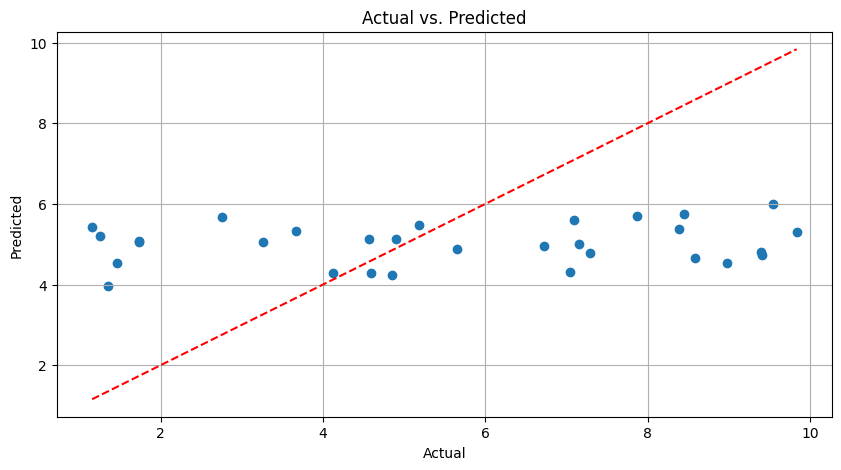

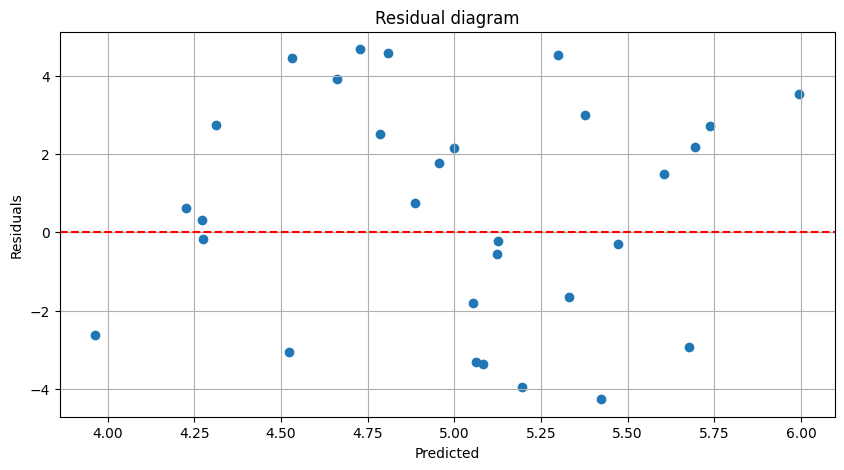

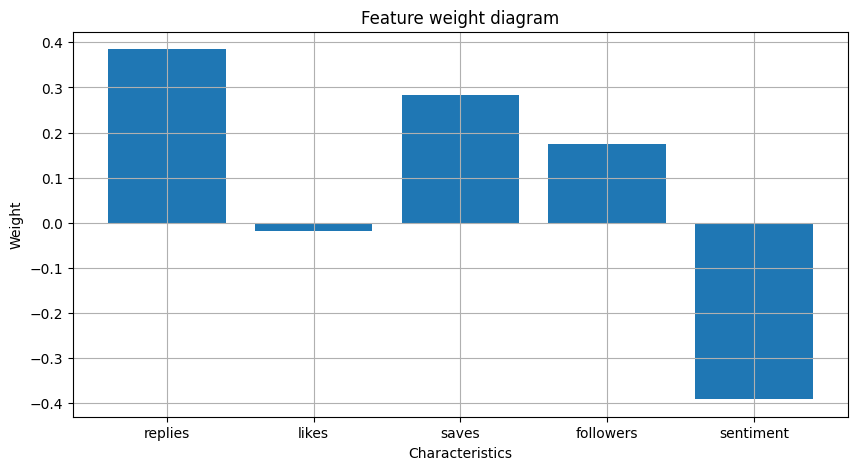

In [18]:
# 读取数据
data = pd.read_csv('train.csv')

# 进行情感分析
def analyze_sentiment(text):
    analysis = SnowNLP(text)
    return analysis.sentiments * 20 - 10  # 将情感极性转换到-10到10范围

data['sentiment'] = data['comments'].apply(analyze_sentiment)

# 特征和目标变量
X = data[['replies', 'likes', 'saves', 'followers', 'sentiment']]
y = data['actual_satisfaction']

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 训练多变量线性回归模型
model = LinearRegression()
model.fit(X_train, y_train)

# 预测和评估
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("均方误差:", mse)

# 输出拟合的权重
weights = model.coef_
print("拟合的权重:", weights)

# 使用拟合的权重计算UXI
data_scaled = scaler.transform(data[['replies', 'likes', 'saves', 'followers', 'sentiment']])
data['fitted_UXI'] = (data_scaled * weights).sum(axis=1)
print(data[['replies', 'likes', 'saves', 'followers', 'sentiment', 'fitted_UXI']])

# 绘制散点图：实际满意度 vs. 预测满意度
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.grid(True)
plt.show()

# 绘制残差图
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual diagram')
plt.grid(True)
plt.show()

# 特征权重图
features = ['replies', 'likes', 'saves', 'followers', 'sentiment']
plt.figure(figsize=(10, 5))
plt.bar(features, weights)
plt.xlabel('Characteristics')
plt.ylabel('Weight')
plt.title('Feature weight diagram')
plt.grid(True)
plt.show()